In [1]:
import warnings
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

from mpvn.metric import WordErrorRate, CharacterErrorRate
from mpvn.model.model import *

from mpvn_wav2vec2.data.grad.lit_data_module import LightningGradDataModule
from mpvn_wav2vec2.configs import DictConfig

/opt/miniconda3/envs/mpvn/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from mpvn_wav2vec2.model.model import Wav2vec2RNNModel

In [2]:
checkpoint_callback = ModelCheckpoint(
    save_top_k=3,
    monitor="valid_loss",
    mode="min",
    dirpath="checkpoint",
    filename="mpvn-{epoch:02d}-{valid_loss:.2f}-{valid_per:.2f}-{valid_acc}",
)
early_stop_callback = EarlyStopping(
    monitor="valid_loss", 
    min_delta=0.00, 
    patience=5, 
    verbose=False, 
    mode="min"
)
logger = TensorBoardLogger("tensorboard", name="Pronunciation for Vietnamese")

In [4]:
configs = DictConfig()

# pl.seed_everything(configs.seed)
warnings.filterwarnings('ignore')

data_module = LightningGradDataModule(configs)
vocab = data_module.get_vocab() 

trainer = pl.Trainer(accelerator='cpu',
                      gpus=0,
                      logger=logger,
                      max_epochs=configs.max_epochs,
                      callbacks=[checkpoint_callback, early_stop_callback])

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [5]:
model = Wav2vec2RNNModel(
                configs=configs,
                num_classes=len(vocab),
                vocab=vocab,
                per_metric=WordErrorRate(vocab)
            )

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [6]:
from mpvn.utils import average_checkpoints
from glob import glob
model = average_checkpoints(model, glob('checkpoint/wav2vec2_finetuned/*'))

In [5]:
model = Wav2vec2RNNModel.load_from_checkpoint(
    '/home/hoa/mispronunciation-detection-for-vietnamese/checkpoint/wav2vec2/mpvn-epoch=13-valid_loss=0.51-valid_per=20.44-valid_acc=0.00-valid_f1=0.00.ckpt',
    configs=configs,
    num_classes=len(vocab),
    vocab=vocab,
    per_metric=WordErrorRate(vocab),
    load_pretrain=True
)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [7]:
model.encoder.wav2vec2_encoder.config.vocab_size = 137

In [9]:
model = model.cpu()

In [10]:
trainer.fit(model, data_module)


  | Name         | Type            | Params
-------------------------------------------------
0 | criterion    | JointLoss       | 0     
1 | encoder      | Wav2Vec2Encoder | 94.5 M
2 | decoder      | RNNDecoder      | 6.7 M 
3 | word_decoder | WordDecoder     | 8.0 M 
-------------------------------------------------
109 M     Trainable params
0         Non-trainable params
109 M     Total params
436.579   Total estimated model params size (MB)


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument index in method wrapper__index_select)

In [19]:
for param in model.encoder.wav2vec2_encoder.wav2vec2.parameters():
    param.requires_grad = False

In [20]:
model.encoder.wav2vec2_encoder.config.vocab_size = 137



  | Name         | Type            | Params
-------------------------------------------------
0 | criterion    | JointLoss       | 0     
1 | encoder      | Wav2Vec2Encoder | 94.5 M
2 | decoder      | RNNDecoder      | 6.7 M 
3 | word_decoder | WordDecoder     | 8.0 M 
-------------------------------------------------
14.8 M    Trainable params
94.4 M    Non-trainable params
109 M     Total params
436.579   Total estimated model params size (MB)


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
Result of fleurs_17412000850165979649
EP: torch.Size([803]) uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6aː6aː6y2ɛ2o4o4əːɜaːɜaːɜo4o4o4tʃeiə6ebu-uə6uə6aː6aː6o2bbəːɜo2o2əːɜhhuə6uə6əːəːtʃtʃtʃtʃtʃtʃuəː6aːɜaːɜuə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6e5ctʃtʃə2uəbaːɜaːɜuə6aːɜba4btʃtʃtʃtʃtʃxuɜaːɜaːɜaːɜuə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6ha2aːɜaːɜaːɜaːɜbuə5uəɜɛ2aːɜaːɜuə6uə6uə6tʃaːaːaːaːaːɛ2t̪iə2haːɜuə6uə6əːəːtʃuə6uə6i5əaːɜaːɜuə6uə6uə6uə6uə6uə6uə6uə6uə6aː6aː6uə6ɛ2o4aːɜaːɜaːɜaːɜuə6e5tʃeɜtʃbboəː4eaːɜ-uə6uə6uə6y4ba4xtʃtʃtʃtʃto4tʃaːɜaːɜuə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6uə6hɛɜhbhi5aː6ɗaːɜuə6uə6uə6o4tʃhhiɛ1yəhhaːɜuə6uə6uə6uə6uə6uə6uə6uə6hyəy4y4aːuə4uə4uə4o4tɔ6aːɜuə6uə6aːɜaːaːaːuə6uə6uə6ɔ6aː6aːɜaːɜuə6uə6uə6uə6uə6uə

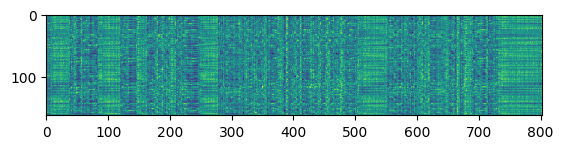

Epoch 0:   0%|          | 0/5879 [00:00<?, ?it/s]                          

In [21]:
trainer.fit(model, data_module)

In [29]:
from mpvn.config.config_small import DictConfig
configs=DictConfig()
model = ConformerRNNModel.load_from_checkpoint(
    '/media/wicii/DDH/class/graduation_project/checkpoint/Checkpoint/finetuned-epoch=24-valid_loss=0.14-valid_per=0.47-valid_acc=0.93-valid_f1=0.68.ckpt',
    configs=configs,
    num_classes=len(vocab),
    vocab=vocab,
    per_metric=WordErrorRate(vocab)
)

AttributeError: 'DictConfig' object has no attribute 'gamma'

In [9]:
model.encoder

Wav2Vec2Encoder(
  (wav2vec2_encoder): Wav2Vec2ForCTC(
    (wav2vec2): Wav2Vec2Model(
      (feature_extractor): Wav2Vec2FeatureExtractor(
        (conv_layers): ModuleList(
          (0): Wav2Vec2GroupNormConvLayer(
            (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
            (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
          )
          (1): Wav2Vec2NoLayerNormConvLayer(
            (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          )
          (2): Wav2Vec2NoLayerNormConvLayer(
            (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          )
          (3): Wav2Vec2NoLayerNormConvLayer(
            (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          )
          (4): Wav2Vec2NoLayerNormConvLayer(
            (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          )
          (5): Wav2Vec2NoLayerNormConvLayer(
            (conv): Conv1d(51

In [ ]:
trainer.fit(model, data_module)

In [ ]:
trainer.validate(model, data_module)

In [ ]:
import os
import librosa
rootdir = '/media/wicii/DDH/class/graduation_project/mpvn/Data'

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file.split('.')[-1] == 'wav':
            print(os.path.join(subdir, file))